In [1]:
from sqlalchemy import create_engine
import pymysql
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sb
import scipy
from math import sqrt
import matplotlib.pyplot as plt
from matplotlib import rcParams

#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn import metrics

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPRegressor, MLPClassifier

#cross validation
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv(r'C:\utda\AnimeList.csv')

In [3]:
data.dtypes

anime_id            int64
title              object
title_english      object
title_japanese     object
title_synonyms     object
image_url          object
type               object
source             object
episodes            int64
status             object
airing               bool
aired_string       object
aired              object
duration           object
rating             object
score             float64
scored_by           int64
rank              float64
popularity          int64
members             int64
favorites           int64
background         object
premiered          object
broadcast          object
related            object
producer           object
licensor           object
studio             object
genre              object
opening_theme      object
ending_theme       object
dtype: object

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14478 entries, 0 to 14477
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   anime_id        14478 non-null  int64  
 1   title           14478 non-null  object 
 2   title_english   5724 non-null   object 
 3   title_japanese  14443 non-null  object 
 4   title_synonyms  8937 non-null   object 
 5   image_url       14382 non-null  object 
 6   type            14478 non-null  object 
 7   source          14478 non-null  object 
 8   episodes        14478 non-null  int64  
 9   status          14478 non-null  object 
 10  airing          14478 non-null  bool   
 11  aired_string    14478 non-null  object 
 12  aired           14478 non-null  object 
 13  duration        14478 non-null  object 
 14  rating          14478 non-null  object 
 15  score           14478 non-null  float64
 16  scored_by       14478 non-null  int64  
 17  rank            12904 non-null 

In [5]:
data.head()

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,...,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,...,Inu x Boku SS was licensed by Sentai Filmworks...,Winter 2012,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ..."
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,...,NaN,Spring 2007,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi..."
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,...,NaN,Fall 2008,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ..."
3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,Finished Airing,...,Princess Tutu aired in two parts. The first pa...,Summer 2002,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ..."
4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,...,NaN,Fall 2012,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)..."


In [6]:
data2 = pd.read_csv(r'C:\utda\AnimeRating.csv')

In [7]:
meanRateUser = data2.groupby(['user_id']).mean().reset_index()
meanRateUser['mean_rating'] = meanRateUser['rating']
meanRateUser.head()

,user_id,anime_id,rating,mean_rating
0,1,12888.483660,-0.712418,-0.712418
1,2,13459.000000,2.666667,2.666667
2,3,13352.744681,7.382979,7.382979
3,4,10135.403846,-1.000000,-1.000000
4,5,11023.301927,4.263383,4.263383


In [8]:
meanRateUser.drop(['anime_id','rating'],axis=1, inplace=True)
meanRateUser.head()

,user_id,mean_rating
0,1,-0.712418
1,2,2.666667
2,3,7.382979
3,4,-1.000000
4,5,4.263383


In [9]:
userRateData = pd.merge(data2, meanRateUser, on=['user_id', 'user_id'])
userRateData.head()

,user_id,anime_id,rating,mean_rating
0,1,20,-1,-0.712418
1,1,24,-1,-0.712418
2,1,79,-1,-0.712418
3,1,226,-1,-0.712418
4,1,241,-1,-0.712418


In [10]:
userDrop = userRateData.drop(userRateData[userRateData.rating < userRateData.mean_rating].index)

In [11]:
userRateData[userRateData['user_id'] == 1].head()

,user_id,anime_id,rating,mean_rating
0,1,20,-1,-0.712418
1,1,24,-1,-0.712418
2,1,79,-1,-0.712418
3,1,226,-1,-0.712418
4,1,241,-1,-0.712418


In [12]:
mergeAnimeList = pd.merge(data, userRateData, on=['anime_id', 'anime_id'])
mergeAnimeList.head()

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,...,related,producer,licensor,studio,genre,opening_theme,ending_theme,user_id,rating_y,mean_rating
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,...,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ...",5,1,4.263383
1,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,...,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ...",41,9,8.558140
2,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,...,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ...",46,10,8.565868
3,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,...,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ...",54,-1,-1.000000
4,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,...,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ...",62,7,8.166667


Cluster Analysis (K Means Clustering)

In [13]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

userAnimeRateList = pd.crosstab(mergeAnimeList['user_id'], mergeAnimeList['title'])
userAnimeRateList.head()

title,"""0""","""Aesop"" no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu","""Bungaku Shoujo"" Kyou no Oyatsu: Hatsukoi","""Bungaku Shoujo"" Memoire","""Bungaku Shoujo"" Movie","""Eiji""",.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,.hack//Gift,...,s.CRY.ed,s.CRY.ed Alteration I: Tao,s.CRY.ed Alteration II: Quan,vivi,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki,◯
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [14]:
PCAdata = PCA(n_components=3)
PCAdata.fit(userAnimeRateList)
PCAsample = PCAdata.transform(userAnimeRateList)
PCAdf = pd.DataFrame(PCAsample)
PCAdf.head()

,0,1,2
0,2.627208,-3.368705,3.274530
1,-2.705089,-0.520662,0.448786
2,0.093875,-1.750981,-2.152278
3,-0.858800,-0.454553,0.283246
4,9.118657,-2.662277,2.257513


In [15]:
dfCluster = pd.DataFrame(PCAdf[[0,1,2]])

In [16]:
clusterer = KMeans(n_clusters=4,random_state=30).fit(dfCluster)
centers = clusterer.cluster_centers_
c_preds = clusterer.predict(dfCluster)

In [17]:
userAnimeRateList['cluster'] = c_preds
userAnimeRateList.head()

title,"""0""","""Aesop"" no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu","""Bungaku Shoujo"" Kyou no Oyatsu: Hatsukoi","""Bungaku Shoujo"" Memoire","""Bungaku Shoujo"" Movie","""Eiji""",.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,.hack//Gift,...,s.CRY.ed Alteration I: Tao,s.CRY.ed Alteration II: Quan,vivi,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki,◯,cluster
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [18]:
cluster1 = userAnimeRateList[userAnimeRateList['cluster']==0].drop('cluster',axis=1).mean()
cluster2 = userAnimeRateList[userAnimeRateList['cluster']==1].drop('cluster',axis=1).mean()
cluster3 = userAnimeRateList[userAnimeRateList['cluster']==2].drop('cluster',axis=1).mean()
cluster4 = userAnimeRateList[userAnimeRateList['cluster']==3].drop('cluster',axis=1).mean()

In [19]:
cluster1.sort_values(ascending=False)[0:10]

title
Death Note                            0.788271
Code Geass: Hangyaku no Lelouch       0.741443
Fullmetal Alchemist                   0.716802
Elfen Lied                            0.714349
Code Geass: Hangyaku no Lelouch R2    0.667187
Suzumiya Haruhi no Yuuutsu            0.651132
Sen to Chihiro no Kamikakushi         0.638421
Neon Genesis Evangelion               0.616680
Tengen Toppa Gurren Lagann            0.569071
Toradora!                             0.561936
dtype: float64

In [20]:
cluster2.sort_values(ascending=False)[0:10]

title
Sword Art Online                0.935883
Angel Beats!                    0.926252
Toradora!                       0.905338
Boku wa Tomodachi ga Sukunai    0.870666
Highschool of the Dead          0.863511
Bakemonogatari                  0.850303
Hataraku Maou-sama!             0.849752
No Game No Life                 0.847276
Shingeki no Kyojin              0.843698
Kore wa Zombie Desu ka?         0.837094
dtype: float64

In [21]:
cluster3.sort_values(ascending=False)[0:10]

title
Death Note                          0.428285
Sword Art Online                    0.270590
Shingeki no Kyojin                  0.270365
Naruto                              0.260098
Elfen Lied                          0.249462
Fullmetal Alchemist                 0.235035
Code Geass: Hangyaku no Lelouch     0.227186
Sen to Chihiro no Kamikakushi       0.222534
Angel Beats!                        0.214788
Fullmetal Alchemist: Brotherhood    0.207902
dtype: float64

In [22]:
cluster4.sort_values(ascending=False)[0:10]

title
Sword Art Online      0.872885
Shingeki no Kyojin    0.825836
Angel Beats!          0.732398
No Game No Life       0.728683
Death Note            0.701692
Mirai Nikki (TV)      0.680974
Tokyo Ghoul           0.650433
Toradora!             0.632274
Noragami              0.606768
Ao no Exorcist        0.599175
dtype: float64

Predictive Modeling Pre-Processing/Exploratory Data Analysis

In [23]:
dfAnime = mergeAnimeList[['user_id', 'anime_id', 'rating_y', 'title_english', 'type', 'source', 'scored_by', 'score', 'favorites', 'members', 'popularity', 'studio']].copy()
dfAnime.head(50)

,user_id,anime_id,rating_y,title_english,type,source,scored_by,score,favorites,members,popularity,studio
0,5,11013,1,Inu X Boku Secret Service,TV,Manga,139250,7.63,2809,283882,231,David Production
1,41,11013,9,Inu X Boku Secret Service,TV,Manga,139250,7.63,2809,283882,231,David Production
2,46,11013,10,Inu X Boku Secret Service,TV,Manga,139250,7.63,2809,283882,231,David Production
3,54,11013,-1,Inu X Boku Secret Service,TV,Manga,139250,7.63,2809,283882,231,David Production
4,62,11013,7,Inu X Boku Secret Service,TV,Manga,139250,7.63,2809,283882,231,David Production
5,66,11013,7,Inu X Boku Secret Service,TV,Manga,139250,7.63,2809,283882,231,David Production
6,87,11013,9,Inu X Boku Secret Service,TV,Manga,139250,7.63,2809,283882,231,David Production
7,98,11013,9,Inu X Boku Secret Service,TV,Manga,139250,7.63,2809,283882,231,David Production
8,112,11013,10,Inu X Boku Secret Service,TV,Manga,139250,7.63,2809,283882,231,David Production
9,120,11013,9,Inu X Boku Secret Service,TV,Manga,139250,7.63,2809,283882,231,David Production


In [24]:
dfAnime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7813510 entries, 0 to 7813509
Data columns (total 12 columns):
 #   Column         Dtype  
---  ------         -----  
 0   user_id        int64  
 1   anime_id       int64  
 2   rating_y       int64  
 3   title_english  object 
 4   type           object 
 5   source         object 
 6   scored_by      int64  
 7   score          float64
 8   favorites      int64  
 9   members        int64  
 10  popularity     int64  
 11  studio         object 
dtypes: float64(1), int64(7), object(4)
memory usage: 775.0+ MB


In [25]:
dfAnime['title_english']=dfAnime['title_english'].astype('category')
dfAnime['type']=dfAnime['type'].astype('category')
dfAnime['source']=dfAnime['source'].astype('category')
dfAnime['studio']=dfAnime['studio'].astype('category')

In [26]:
dfAnime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7813510 entries, 0 to 7813509
Data columns (total 12 columns):
 #   Column         Dtype   
---  ------         -----   
 0   user_id        int64   
 1   anime_id       int64   
 2   rating_y       int64   
 3   title_english  category
 4   type           category
 5   source         category
 6   scored_by      int64   
 7   score          float64 
 8   favorites      int64   
 9   members        int64   
 10  popularity     int64   
 11  studio         category
dtypes: category(4), float64(1), int64(7)
memory usage: 581.4 MB


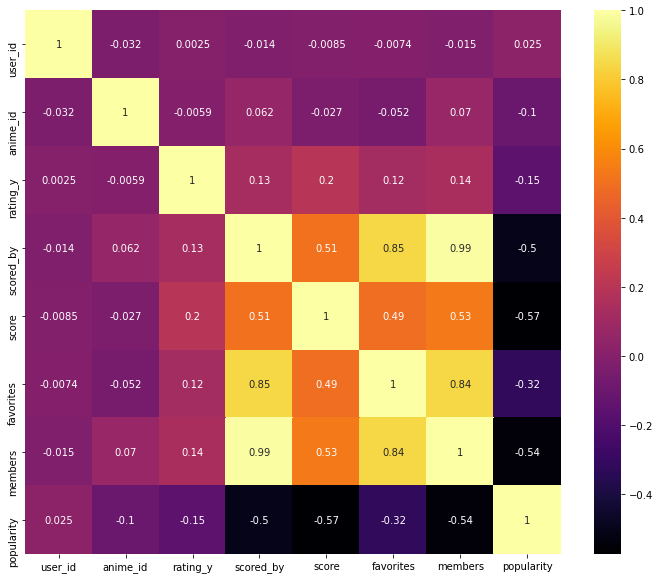

In [27]:
import seaborn as sb
plt.figure(figsize=(12,10))
cor = dfAnime.corr()
sb.heatmap(cor, annot=True, cmap=plt.cm.inferno)
plt.show()